In [1]:
from pgnano.stats_analysis.primitives import PGPoreType
from pgnano.stats_analysis.jupyter_data_preparation import flatten_sample_data
from functools import partial
from pgnano.stats_analysis.coding_analysis_scripts import *
from scipy.stats import geom, halfnorm
from scipy.linalg import lstsq
from scipy.fft import fft
from itertools import repeat
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import statistics

In [2]:
signal_data, chunk_data = flatten_sample_data(PGPoreType.P9_4_1,100)
error = transform_signal_to_error(signal_data[0])
code = transform_error_to_code(error)

['/data/datananoraw/data_analysis/9_4_1/0792a506-batch11.pod5', '/data/datananoraw/data_analysis/9_4_1/13ccd92f-batch33.pod5', '/data/datananoraw/data_analysis/9_4_1/16723ac7-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/23a8b088-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/3824828f-batch12.pod5', '/data/datananoraw/data_analysis/9_4_1/5524fc3c-batch13.pod5', '/data/datananoraw/data_analysis/9_4_1/6f82bcb6-batch28.pod5', '/data/datananoraw/data_analysis/9_4_1/93f9b40d-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/9a6e2862-batch36.pod5', '/data/datananoraw/data_analysis/9_4_1/af5138bf-batch7.pod5', '/data/datananoraw/data_analysis/9_4_1/b8feca29-batch25.pod5', '/data/datananoraw/data_analysis/9_4_1/bb5fa810-batch19.pod5', '/data/datananoraw/data_analysis/9_4_1/df68bb8f-batch3.pod5', '/data/datananoraw/data_analysis/9_4_1/e1e34260-batch11.pod5', '/data/datananoraw/data_analysis/9_4_1/e2564fd3-batch22.pod5']
[('/data/datananoraw/data_analysis/9_4_1/af5138bf-batch7

In [3]:
whole_data = []

for data in signal_data:
    whole_data.extend(data)

print(max(whole_data))

890


In [4]:
low_4 = np.bincount(code & 0x0F)
high_4 = np.bincount((code & 0xFF0) >> 4)
low_5 = np.bincount(code & 0x1F)
high_5 = np.bincount((code & 0xFE0) >> 5)
low_6 = np.bincount(code & 0x3F)
high_6 = np.bincount((code & 0xFC0) >> 6)

In [5]:
linear_low_4 = lstsq(np.column_stack((
                list(repeat(1,16)),
                range(16))
            ),low_4)[0]
n_4 = linear_low_4[0]
m_4 = linear_low_4[1]

linear_low_5 = lstsq(np.column_stack((
                list(repeat(1,32)),
                range(32))
            ),low_5)[0]
n_5 = linear_low_5[0]
m_5 = linear_low_5[1]

linear_low_6 = lstsq(np.column_stack((
                list(repeat(1,64)),
                range(64))
            ),low_6)[0]
n_6 = linear_low_6[0]
m_6 = linear_low_6[1]

In [6]:
p_4 = estimate_geometric_param(((code & 0xFF0) >> 4) + 1)
p_5 = estimate_geometric_param(((code & 0xFE0) >> 5) + 1)
p_6 = estimate_geometric_param(((code & 0xFC0) >> 6) + 1)
print(p_4)
print(p_5)
print(p_6)

0.6318434239882124
0.8463973484037354
0.9529544954243844


In [7]:
print((((code & 0xFE0) >> 5) + 1)[:100])

[27  3  2  1  1  2  2  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  2  1  1  1  3  1
  1  1  1  2  2  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  3  1  1  1
  1  1  1  1  1  1  1  1  1  2  2  1  1  2  1  1  1  1  1  1  1  2  2  1
  2  1  1  1]


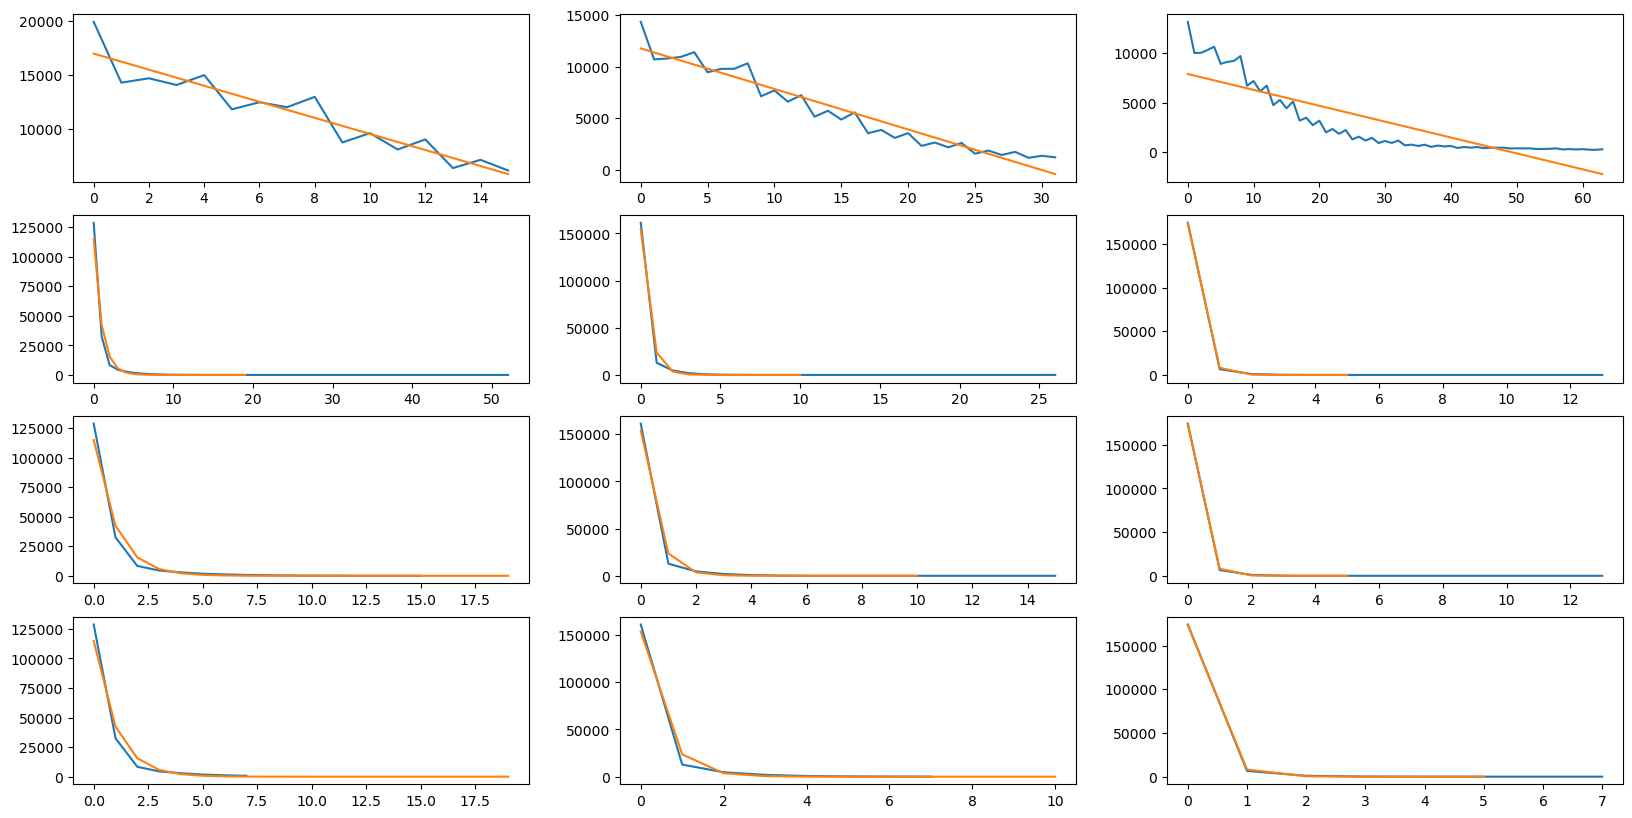

In [8]:
figs, axs = plt.subplots(4,3,figsize=(20,10))

axs[0][0].plot(low_4)
axs[0][0].plot(list(map(lambda x: m_4 * x + n_4, range(1 << 4))))

axs[0][1].plot(low_5)
axs[0][1].plot(list(map(lambda x: m_5 * x + n_5, range(1 << 5))))

axs[0][2].plot(low_6)
axs[0][2].plot(list(map(lambda x: m_6 * x + n_6, range(1 << 6))))

axs[1][0].plot(high_4)
axs[1][0].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_4),
        geom.ppf(0.999999999, p_4))
    ,p_4) * len(code)
)

axs[1][1].plot(high_5)
axs[1][1].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_5),
        geom.ppf(0.999999999, p_5))
    ,p_5) * len(code)
)

axs[1][2].plot(high_6)
axs[1][2].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_6),
        geom.ppf(0.999999999, p_6))
    ,p_6) * len(code)
)

limit=16

axs[2][0].plot(high_4[:limit])
axs[2][0].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_4),
        geom.ppf(0.999999999, p_4))
    ,p_4) * len(code)
)

axs[2][1].plot(high_5[:limit])
axs[2][1].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_5),
        geom.ppf(0.999999999, p_5))
    ,p_5) * len(code)
)

axs[2][2].plot(high_6[:limit])
axs[2][2].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_6),
        geom.ppf(0.999999999, p_6))
    ,p_6) * len(code)
)

limit=8

axs[3][0].plot(high_4[:limit])
axs[3][0].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_4),
        geom.ppf(0.999999999, p_4))
    ,p_4) * len(code)
)

axs[3][1].plot(high_5[:limit])
axs[3][1].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_5),
        geom.ppf(0.999999999, p_5))
    ,p_5) * len(code)
)

axs[3][2].plot(high_6[:limit])
axs[3][2].plot(geom.pmf(
    np.arange(
        geom.ppf(0.01, p_6),
        geom.ppf(0.999999999, p_6))
    ,p_6) * len(code)
)

In [9]:
low_8 = np.bincount(code & 0xFF)
high_8 = np.bincount((code & 0xF00) >> 8)

low_9 = np.bincount(code & 0x1FF)
high_9 = np.bincount((code & 0xE00) >> 9)

low_10 = np.bincount(code & 0x3FF)
high_10 = np.bincount((code & 0xC00) >> 10)
p_8 = estimate_geometric_param(((code & 0xF00) >> 8) + 1)
p_9 = estimate_geometric_param(((code & 0xE00) >> 9) + 1)
p_10 = estimate_geometric_param(((code & 0xC00) >> 10) + 1)
print(p_8)
print(p_9)
print(p_10)

0.9999725007287307
0.9999945000247499
1.0


In [10]:
print(max(code))

843


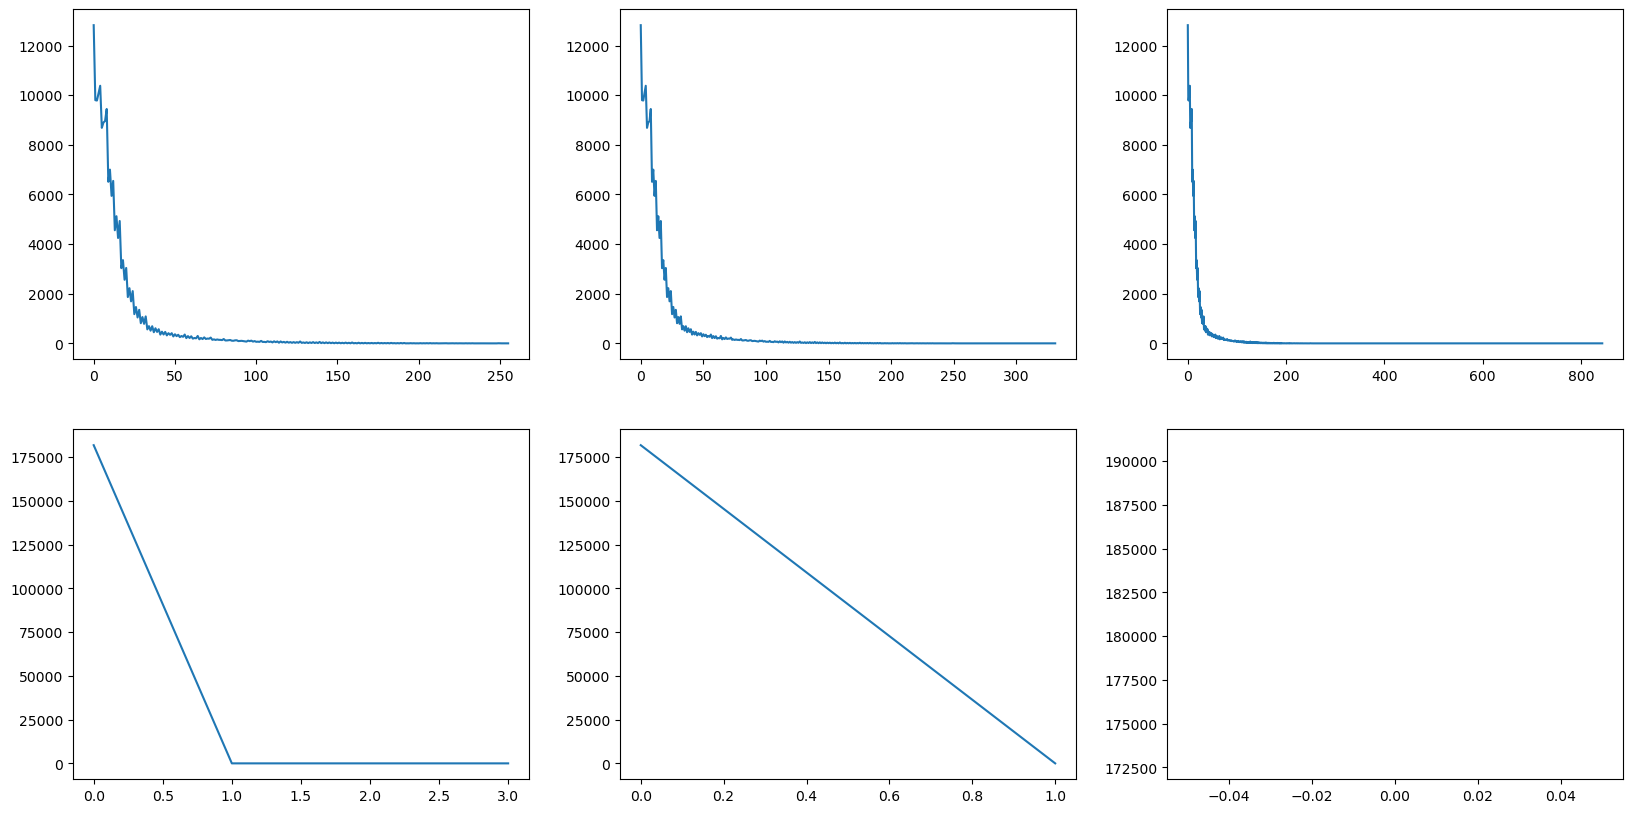

In [11]:
figs, axs = plt.subplots(2,3,figsize=(20,10))

axs[0][0].plot(low_8)
#axs[0][0].plot(geom.pmf(
#    np.arange(
#        geom.ppf(0.01, p_8),
#        geom.ppf(0.999999999, p_8))
#    ,p_8) * len(code)
#)

axs[0][1].plot(low_9)
#axs[0][1].plot(geom.pmf(
#    np.arange(
#        geom.ppf(0.01, p_9),
#        geom.ppf(0.999999999, p_9))
#    ,p_9) * len(code)
#)

axs[0][2].plot(low_10)
#axs[0][2].plot(geom.pmf(
#    np.arange(
#        geom.ppf(0.01, p_10),
#        geom.ppf(0.999999999999999, p_10))
#    ,p_10) * len(code)
#)

axs[1][0].plot(high_8)
axs[1][1].plot(high_9)
axs[1][2].plot(high_10)


In [12]:
low_8_prime = np.bincount(code & 0xFF)
high_8_prime = np.bincount((code & 0xF00) >> 8)

low_9_prime = np.bincount(code & 0x1FF)
high_9_prime = np.bincount((code & 0xE00) >> 9)

low_10_prime = np.bincount(code & 0x3FF)
high_10_prime = np.bincount((code & 0xC00) >> 10)
p_8_prime = estimate_geometric_param((((code & 0xF00) >> 8) >> 1) + 1)
p_9_prime = estimate_geometric_param((((code & 0xE00) >> 9) >> 1) + 1)
p_10_prime = estimate_geometric_param((((code & 0xC00) >> 10) >> 1) + 1)
print(p_8_prime)
print(p_9_prime)
print(p_10_prime)

0.9999945000247499
1.0
1.0
